<a href="https://colab.research.google.com/github/emerson-diego/ImersaoDadosAlura-3/blob/main/alura_imersao_3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hoje, nosso foco é nos aprofundar ainda mais na base de dados e entender mais sobre a relação entre as nossas variáveis.

Olhando para o nosso conjunto de dados, percebemos que temos dados de tratamento, tempo, dosagem, composto químico usado e os dados genéticos. E os primeiros dados que vamos relacionar são aqueles ligados ao tratamento e, como já vimos anteriormente, estes são dados categóricos.

Um dos vieses de análise está relacionado às proporções destas categorias e, como aprendemos na aula anterior, um gráfico de frequências pode ser muito útil nesse aspecto.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set() #pega as configurações padrões do seaborn

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')

dados.columns = dados.columns.str.replace('-','')
mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)
dados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125



Conforme nossa busca na [documentação do Pandas](https://pandas.pydata.org/), encontramos uma maneira para construir uma tabela de frequências, a função crosstab. Esta função recebe como argumentos os dados que gostaríamos de correlacionar de uma maneira bem simples: crosstab(dataframe['coluna1'], dataframe['coluna2']) e então, como retorno, temos uma matriz que relaciona essas variáveis a partir da frequência.

Podemos ver que as categorias da variável dose transformaram-se em linhas e as categorias da variável tempo são colunas.

In [ ]:
pd.crosstab(dados['dose'], dados['tempo']) #tabela de frequência

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885



Entretanto, na matriz acima não estamos considerando o tratamento usado, apesar desta variável ser de suma importância, visto que, decide se há ou não presença de um composto no evento. Por isso, vamos construir uma nova tabela com o crosstab considerando essa nova variável.

Para isso, usaremos a mesma sintaxe anterior, adicionando dados['tratamento']ao final e, adicionalmente, deixamos as duas primeiras colunas declaradas entre colchetes, pois assim garantimos que suas informações estarão distribuídas nas linhas, ou seja, o código final para este comando será: crosstab(dataframe[['coluna1'], dataframe['coluna2']], dataframe['coluna3']).

O resultado será uma tabela de frequências multi-index (mais de um índice) sendo que o index da esquerda se refere aos dados da variável dose e o index da direita são as informações de tempo, respeitando a ordem na qual declaramos as respectivas variáveis.

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento']) 

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

Apesar de já termos construído uma tabela bem interessante através da frequência de algumas variáveis, podemos explorar a proporção destes dados entre si.

Para fazer isso vamos, novamente, copiar o nosso comando acrescentando um novo parâmetro ao final, o normalize. Então o código ficará: crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize='index'). Esse parâmetro normaliza a nossa tabela e escolhemos que ela faça isso a partir do índice, ou seja, ela fará a comparação entre as categorias, isto é, a soma de cada linha será igual a 1. Fazer este tipo de análise possibilita que façamos algumas suposições acerca do balanceamento entre as categorias e, analisando a nossa matriz, podemos concluir que há proporcionalidade na nossa base de dados.

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize=True) 

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.012640   0.150542
     48         0.014403   0.168430
     72         0.012892   0.151172
D2   24         0.012808   0.150374
     48         0.012808   0.150794
     72         0.012808   0.150332

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize='index') # 100% agora é cada linha

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

Podemos também agregar à nossa matriz uma métrica estatística associada a uma coluna. Para que isso seja cumprido, adicionamos mais dois parâmetros à nossa função crosstab: o primeiro é o values = dataframe['variavel'] e o segundo é o aggfunc que recebe como parâmetro alguma métrica estatística, como a média. Logo, aggfunc = 'mean'. Isso quer dizer que queremos comparar entre as diferentes categorias (com_controle e com_droga) a média de valores associados a variável g-0.

Aqui, podemos perceber algumas diferenças entre essas médias e podemos traçar algumas hipóteses a serem verificadas. Lembrando que a média de uma variável, é uma conta feita a partir dos valores que aquela amostra apresenta e não é o valor que ela assume, de fato. Por isso, não podemos concluir nada somente olhando a média, mas entender seu comportamento nos dá indícios por quais caminhos podemos seguir.

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g0'], aggfunc= 'mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439


Para variáveis contínuas, fazer tabelas de frequências não é a melhor estratégia para analisá-las. Mas, construir um novo tipo de gráfico pode ser muito interessante para o nosso processo.

Então, para fins de visualização, o primeiro passo é filtrar a nossa base de dados com as colunas que queremos investigar. No nosso caso, vamos analisar a relação entre as colunas g-0 e g-3 e, por isso, definimos uma lista de arrays com os nomes dessas colunas (dataframe[['coluna1', 'coluna2']]) e, como retorno, teremos nosso conjunto somente com as variáveis alvo.

In [ ]:
dados[['g0', 'g3']]

,g0,g3
0,1.0620,-0.6208
1,0.0743,0.0604
2,0.6280,-0.0764
3,-0.5138,0.5288
4,-0.3254,0.6919
...,...,...
23809,0.1394,-0.5080
23810,-1.3260,0.9905
23811,0.3942,-0.7389
23812,0.6660,0.2044


In [ ]:
dados[['g0','g3']]

,g0,g3
0,1.0620,-0.6208
1,0.0743,0.0604
2,0.6280,-0.0764
3,-0.5138,0.5288
4,-0.3254,0.6919
...,...,...
23809,0.1394,-0.5080
23810,-1.3260,0.9905
23811,0.3942,-0.7389
23812,0.6660,0.2044


O scatterplot é um tipo de gráfico pré programado da biblioteca Seaborn e recebe como parâmetros a variável que vai ser usada no eixo x, a variável do eixo y e, por fim, o conjunto de dados.

O código ficará:

sns.scatterplot(x = 'variavel para o eixo x', y = 'variavel para o eixo y', data = base de dados)

E, como queremos investigar as variáveis g-0 e g-3, atribuímos cada uma delas a um eixo.

O gráfico de dispersão utiliza os dados como uma coleção de pontos cartesianos e ele é usado para apurar se há relação de causa e efeito entre duas variáveis quantitativas.

No nosso caso, cada linha será um par ordenado de acordo com o que declaramos no código, ou seja, o valor de g-0 será a cordenada x e o valor de g-3 será a coordenada y.

Por exemplo: para a linha 0 da base de dados teremos (1,0620 , -0,6208)

Mas, por outro lado, a partir do gráfico de dispersão, não podemos dizer que uma variável afeta a outra, podemos apenas definir se há relação entre elas e qual a intensidade disso.

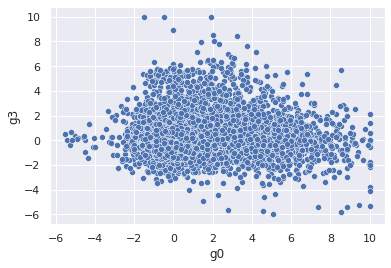

In [ ]:
sns.scatterplot(x='g0', y='g3', data=dados)


Observando o gráfico que construímos acima, não parecemos encontrar nenhum padrão tão definido. Então, vamos confrontar mais duas colunas para verificar se encontramos algum padrão melhor definido.

Aqui, vamos usar a variável g-0 para o eixo x e a variável g-8 para o eixo y para construir o nosso novo gráfico.

Como retorno, recebemos um gráfico de dispersão onde a nuvem de pontos cartesianos parece desenhar melhor um padrão: conforme o g-0 aumenta, o valor de g-8 diminui. Aparentemente, a relação entre essas duas variáveis desenha uma curva com inclinação negativa.

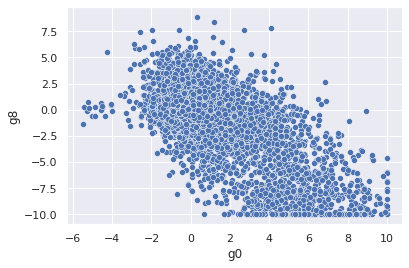

In [ ]:
sns.scatterplot(x='g0', y='g8', data=dados)


E, como parte do nosso trabalho é levantar hipóteses e confirmá-las (ou não), precisamos verificar se a nossa suspeita de que a relação entre as variáveis g-0 e g-8 desenha uma curva com inclinação negativa.

Para isso, vamos utilizar uma outra função do Seaborn, a lmplot. A lmplot vai desenhar no nosso gráfico de dispersão uma linha de tendência e, assim, poderemos confirmar o padrão daquele conjunto de dados.

Os parâmetros a serem recebidos, são muito parecidos com aqueles usados no scatterplot. Então teremos

sns.lmplot(data=base de dados, x='variavel para o eixo x', y='variavel para o eixo y', line_kws={'color': 'cor da linha de tendencia'})

Utilizamos o parâmetro line_kws = {'color': 'red'} para criar um bom contraste entre os pontos do gráfico de dispersão e a linha de tendência.

Observando o nosso gráfico, podemos concluir a nossa hipótese inicial, mas ele ainda não é suficiente para finalizarmos a nossa análise.

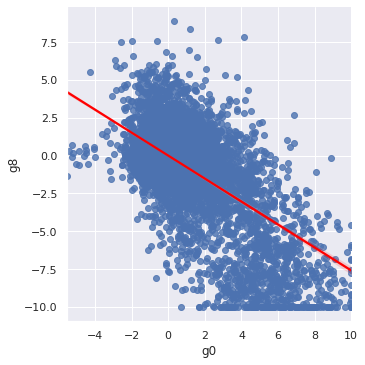

In [ ]:
sns.lmplot(data=dados, x='g0', y='g8', line_kws={'color':'red'})

Para uma análise mais real e completa, é interessante que separemos ainda mais o nosso conjunto de dados. Isso porque, na imagem acima, apesar de termos uma linha de tendência para a relação entre os dados g-0 e g-8, não há filtros para a dosagem, o tratamento e o tempo. E, pesando em drug discorevy, é extremamente importante que façamos a separação desses conjuntos.

Então, vamos acrescentar mais alguns parâmetros para executar a separação. Acrescentamos o parâmetro col = tramento para que sejam plotados gráficos de acordo com as categorias da variável em questão nas colunas (com_droga e com_controle) e também incluímos o parâmetro row = 'tempo' para que mais uma subdivisão seja feita e, as linhas apresentem novos gráficos com as diferentes categorias (24,48 e 72).

Assim, podemos perceber as nuances de cada gráfico e o comportamento de determinado subconjunto.

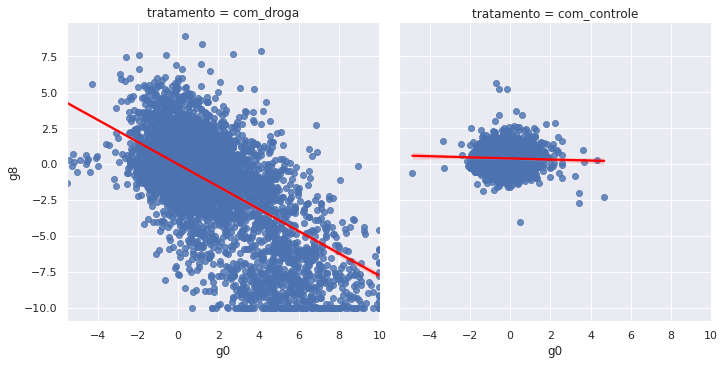

In [ ]:
sns.lmplot(data=dados, x='g0', y='g8', line_kws={'color':'red'}, col='tratamento')

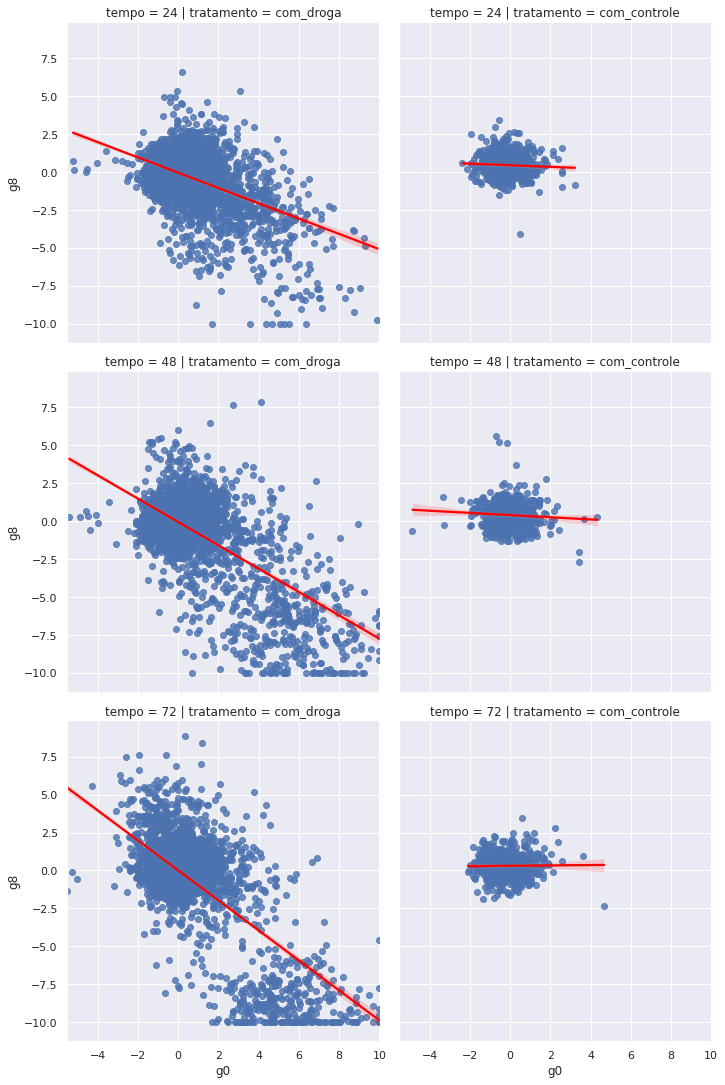

In [ ]:
sns.lmplot(data=dados, x='g0', y='g8', line_kws={'color':'red'}, col='tratamento', row='tempo')

Outra medida para analisar como as variáveis estão associadas é a correlação.

Para isso, vamos usar uma função já conhecida do Pandas, o loc e, vamos agregar o .corr. O loc serve para definirmos o intervalo em que a correlação vai ser calculada. Aqui, estamos calculando a correlação entre todos os genes.

Como retorno, temos uma tabela bem grande que correlaciona a variável e apresenta valores entre 1 e -1. Por exemplo, o primeiro valor numérico apresentado na primeira linha é o resultado da correlação entre a variável que está nesta linha e nesta coluna, no nosso caso, o g-0 em ambas as extremidades. No primeiro valor numérico apresentado na segunda linha, temos a correlação entre g-1 e g-0 e assim por diante.

Mas, como interpretar esses valores? Bom, temos a seguinte divisão:

- Valores muito próximos de 1 ou -1: variáveis altamente correlacionadas
- Valores muito próximos de 0: variáveis pouco ou não correlacionadas

E, o que diferencia se essa correlação será proporcional ou inversamente proporcional, será o sinal. Quer dizer:

- Valores muito próximos de 1: variáveis proporcionalmente correlacionadas
- Valores muito próximos de -1: variáveis correlacionadas inversamente proporcionais

Agora que já sabemos como analisar essa tabela, podemos voltar para o nosso gráfico de dispersão construído com g-0 e `g-8 e perceber que a nossa tabela confirma que ambas as variáveis estão correlacionadas e são inversamente proporcionais, visto que o valor apresentado na tabela é de -0,604212.

In [ ]:
dados.loc[:,'g0':'g71'].corr() # perto de 1 e -1 são correlacionados, perto de zero não afeta o outro

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,g40,g41,g42,g43,g44,g45,g46,g47,g48,g49,g50,g51,g52,g53,g54,g55,g56,g57,g58,g59,g60,g61,g62,g63,g64,g65,g66,g67,g68,g69,g70,g71
g0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,-0.432426,-0.499815,-0.203828,0.021582,-0.023423,-0.119687,0.530238,0.039827,0.238235,0.310583,-0.560201,0.291476,-0.293906,0.263799,0.318724,-0.456709,-0.130850,-0.245901,-0.481191,-0.200365,0.095231,-0.385378,-0.606430,-0.595861,-0.281017,0.343524,0.140962,-0.565075,0.473076,0.226192,-0.411117,-0.108916
g1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,0.000655,-0.110238,0.133896,0.161186,-0.092498,0.031993,0.097674,-0.012420,0.029064,-0.106349,-0.028870,-0.057648,0.037969,-0.059497,-0.019873,0.114727,-0.127237,-0.056013,-0.043314,0.184889,-0.047734,0.098201,0.043737,0.033561,0.093231,0.017870,-0.060414,-0.009744,0.115366,-0.115127,0.043924,-0.146851
g2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,-0.080201,-0.109646,-0.121433,-0.086435,0.021241,-0.036105,0.142712,-0.009575,0.039119,0.052003,-0.140002,0.047647,-0.058874,0.054844,0.085142,-0.159016,-0.035817,-0.042007,-0.128388,-0.124065,0.090874,-0.138144,-0.137042,-0.189124,-0.168975,0.072918,0.081314,-0.153966,0.102565,0.099248,-0.121961,-0.000929
g3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,0.114685,-0.047136,-0.010941,-0.168398,-0.001770,0.065444,0.082046,0.297146,0.173796,0.072970,-0.233491,0.125193,-0.163648,0.012809,0.068682,-0.126877,-0.037438,0.172727,-0.219228,-0.271885,-0.025451,-0.023958,-0.053789,-0.216742,-0.091471,0.102956,0.069750,-0.111437,0.110005,0.051048,-0.150679,-0.071811
g4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,-0.309149,-0.373390,0.071462,0.185361,-0.105936,-0.033695,0.355833,-0.060724,0.006138,0.114748,-0.315675,0.165373,-0.069761,0.185821,0.116731,-0.146464,-0.130330,-0.272397,-0.292469,0.001778,0.128815,-0.037494,-0.361359,-0.201015,0.001491,0.098481,0.078869,-0.362879,0.376517,0.085298,-0.166065,-0.003956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


Analisar essa grande tabela é um desafio bem grande. Então, como auxílio visual costumamos plotar um mapa de calor para que possamos identificar com maior facilidade a correlação entre as variáveis.

E, como esse código já está construído na própria documentação do Seaborn, vamos copiar o código de lá, fazendo apenas algumas pequenas alterações.

Então, de corr = d.corr() mudamos para corr = dados.loc[:,'g-0':'g-50'].corr() pois ajustamos o d para a nossa base de dados (dados) e decidimos incluir um loc para fazer o mapa de calor apenas do g-0 ao g-50. Também retiramos o parâmetro vmax=.3 da última parte do código pois este era um limitador da correlação que não nos interessa no momento.

Adicionalmente, também fizemos a importação da biblioteca Numpy que é usada para gerar este mapa de calor (import numpy as np).

O mapa de calor mostra uma escala de cores em sua lateral direita, a legenda e, para cada pontinho, podemos perceber a força da correlação sendo mostrada através de uma cor associada.

Olhando para o nosso gráfico, percebemos que, em sua maioria, as expressões genicas não apresentam correlações tão altas entre si (podemos deduzir isso observando que o gráfico em grande parte é translúcido).

É importante destacar que não podemos inferir causalidade a partir da correlação, como já descrevemos anteriormente no gráfico de dispersão. Exemplificando: vimos que g-0 e g-8 têm correlação inversamente proporcional entre si mas não podemos concluir que é o g-0 que faz o g-8 diminuir, ou seja, a causa.

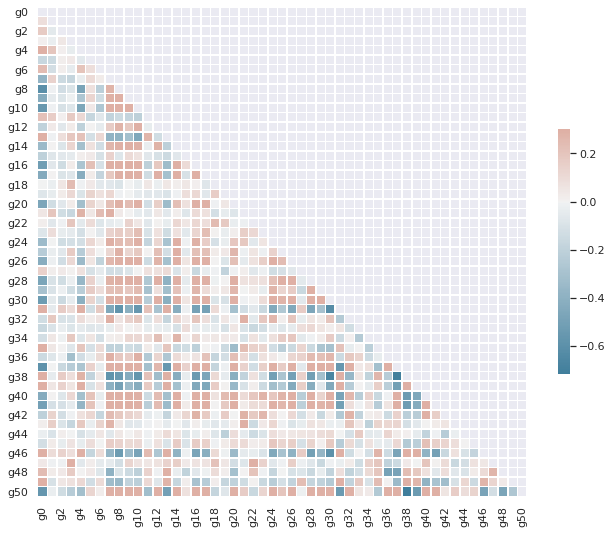

In [ ]:
import numpy as np

# Compute the correlation matrix
corr = dados.loc[:,'g0':'g50'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Agora, vamos repetir o processo de construção do mapa de calor para a a viabilidade celular (c).

Definimos uma nova variável corr_celular e ajustamos os parâmetros de acordo com os nossos cs.

Observando o gráfico de saída, podemos perceber uma grande diferença entre os dois mapas de calor que construímos. A escala deste novo gráfico é bem diferente da escala anterior, temos valores apenas entre 0,65 e 0,90, correlações altamente proporcionais.

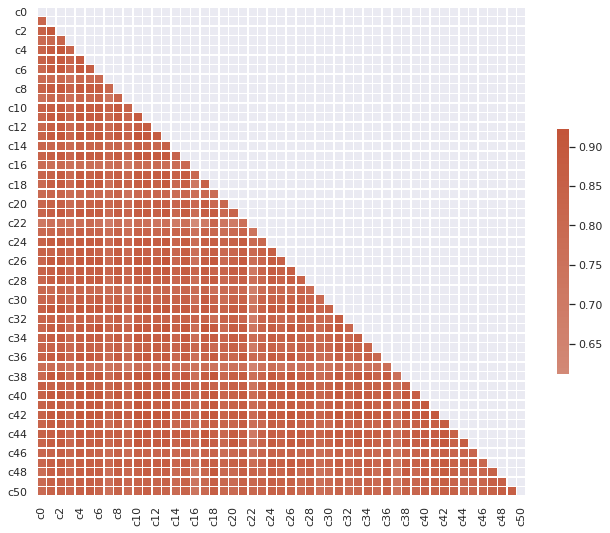

In [ ]:
corr_celular = dados.loc[:,'c0':'c50'].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celular, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

###Desafio 01: Criar tabelas de frequência com pandas.groupby()
###Desafio 02: Normalizar o crosstab pela coluna
###Desafio 03: Explorar outros agregadores
###Desafio 04: Explorar o melt

###Desafio 01: Criar tabelas de frequência com pandas.groupby()

A ferramenta groupby, da maneira mais simples, realiza a seguinte operação. Usar apenas o groupby cria um objeto pandas chamado de series. Um dataframe é composto de series.


Primeiro vamos analisar a tabela crosstab de referência.

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento']) # Versão com o crosstab

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [ ]:
dados.groupby('dose')
dados.groupby('dose').size() #Para ver o número de elementos desse objeto

dose
D1    12147
D2    11667
dtype: int64

In [ ]:
dados.groupby(['dose','tempo','tratamento']).size() #dados.groupby(['dose','tempo','tratamento']).size()

dose  tempo  tratamento  
D1    24     com_controle     301
             com_droga       3585
      48     com_controle     343
             com_droga       4011
      72     com_controle     307
             com_droga       3600
D2    24     com_controle     305
             com_droga       3581
      48     com_controle     305
             com_droga       3591
      72     com_controle     305
             com_droga       3580
dtype: int64

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize='index') # Versão com o crosstab normalizada

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [ ]:
com_droga = dados[dados['tratamento']=='com_droga'].groupby(['dose','tempo']).count()['tratamento'] #Agrupa os dados por dose e por tempo e faz a contagem para os dados com_droga

com_droga

dose  tempo
D1    24       3585
      48       4011
      72       3600
D2    24       3581
      48       3591
      72       3580
Name: tratamento, dtype: int64

In [ ]:
com_controle = dados[dados['tratamento']=='com_controle'].groupby(['dose','tempo']).count()['tratamento'] #Agrupa os dados por dose e por tempo e faz a contagem para os dados com_controle

com_controle

dose  tempo
D1    24       301
      48       343
      72       307
D2    24       305
      48       305
      72       305
Name: tratamento, dtype: int64

In [ ]:
concatenado = pd.concat([com_controle,com_droga],axis=1) #Juntando tudo em um único dataframe
concatenado

tratamento  tratamento
dose tempo                        
D1   24            301        3585
     48            343        4011
     72            307        3600
D2   24            305        3581
     48            305        3591
     72            305        3580

In [ ]:
concatenado.columns = ['com_controle','com_droga'] #mudando o nome das colunas
concatenado

com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [ ]:
concatenado.div(concatenado.sum(axis=1),axis=0) # Normalizando os dados

com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

###Desafio 02: Normalizar o crosstab pela coluna.

[Documentação Pandas crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html?highlight=crosstab#pandas.crosstab)


No exemplo da aula, foi normalizado para cada linha, como mostrado abaixo:

In [ ]:
pd.crosstab([dados['dose'],dados['tempo']],dados['tratamento'],normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize='columns') # Versão com o crosstab normalizada

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

Aqui pode-se observar que temos um balanceamento igual que apenas muda para as amostras com D1 medidas com tempo 48, como já apontado anteriormente.

###Desafio 03: Explorar outros agregadores.

Aqui algumas opções de agregadores. Na [documentação do pandas ](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html?highlight=aggfunc)você pode obter ainda mais opções.

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], values=dados['g0'], aggfunc='min')

tratamento  com_controle  com_droga
dose tempo                         
D1   24           -2.370     -5.183
     48           -3.276     -5.420
     72           -2.086     -5.261
D2   24           -2.135     -5.233
     48           -4.859     -4.567
     72           -1.909     -5.513

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], values=dados['g0'], aggfunc='max')

tratamento  com_controle  com_droga
dose tempo                         
D1   24            3.226      9.908
     48            3.423     10.000
     72            2.584      9.355
D2   24            2.601      7.167
     48            4.335     10.000
     72            4.670     10.000

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], values=dados['g0'], aggfunc='last')

tratamento  com_controle  com_droga
dose tempo                         
D1   24           0.0465     0.6660
     48           1.1120     0.1420
     72          -0.6204    -0.8598
D2   24           0.7200    -1.3260
     48           0.3942    -0.1150
     72          -0.1051    -0.4330

In [ ]:
pd.crosstab([dados['dose'],dados['tempo']],dados['tratamento'], values=dados['g0'],aggfunc='median')

tratamento  com_controle  com_droga
dose tempo                         
D1   24          -0.2912    0.02700
     48          -0.2145    0.01620
     72          -0.3655    0.02615
D2   24           0.0096   -0.02610
     48          -0.0506   -0.02960
     72           0.0528    0.00015

In [ ]:
pd.crosstab([dados['dose'],dados['tempo']],dados['tratamento'], values=dados['g0'],aggfunc='std')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.751395   1.461954
     48         0.853396   1.693903
     72         0.769294   1.458600
D2   24         0.836626   1.044999
     48         0.836845   1.315476
     72         0.878041   1.451532

In [ ]:
pd.crosstab([dados['dose'],dados['tempo']],dados['tratamento'], values=dados['g0'],aggfunc='sum')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         -75.7799  1319.2648
     48         -42.1113  1654.4150
     72         -90.6483  1030.5010
D2   24           3.2800   412.7202
     48           4.0180   770.1980
     72          21.4262   907.3112

Para aplicações de outras funções pode se utilizar o método apply

###Desafio 04: Explorar o melt.


A documentação do melt no pandas pode ser acessada através deste [link](https://pandas.pydata.org/docs/reference/api/pandas.melt.html)

Exemplo de aplicação onde queremos comparar a dose com o valor de g-0:

In [ ]:
pd.melt(dados,id_vars=['dose'],value_vars=['g0'])

,dose,variable,value
0,D1,g0,1.0620
1,D1,g0,0.0743
2,D1,g0,0.6280
3,D1,g0,-0.5138
4,D2,g0,-0.3254
...,...,...,...
23809,D2,g0,0.1394
23810,D2,g0,-1.3260
23811,D2,g0,0.3942
23812,D1,g0,0.6660


###Desafio 05: Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos.

In [ ]:
corr = dados.loc[:,'g0':'c99'].corr()

In [ ]:
corr_celular_genes = corr.loc['g0':'g50','c0':'c50']

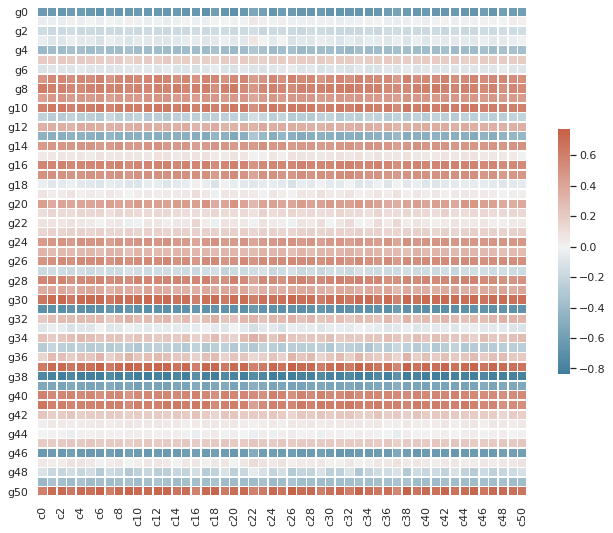

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular_genes, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

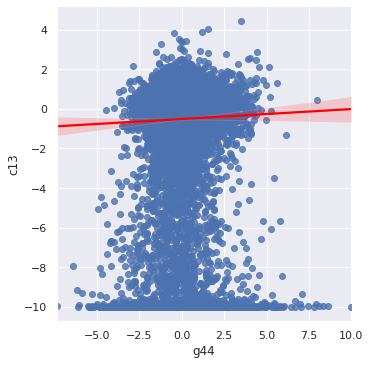

In [ ]:
sns.lmplot(data=dados, x='g44', y='c13', line_kws={'color': 'red'})

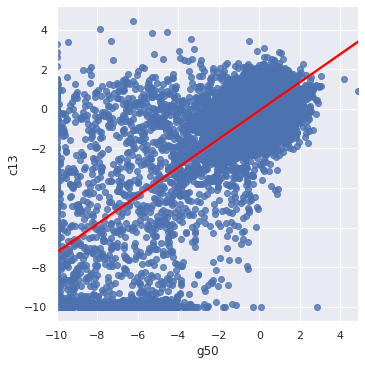

In [ ]:
sns.lmplot(data=dados, x='g50', y='c13', line_kws={'color': 'red'})

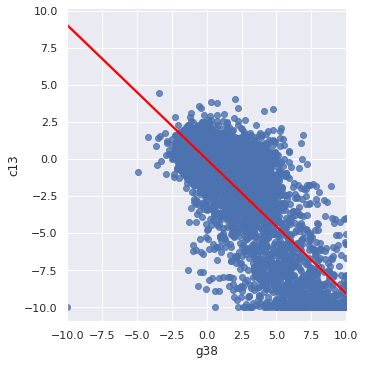

In [ ]:
sns.lmplot(data=dados, x='g38', y='c13', line_kws={'color': 'red'})

###Desafio 06: Estudar o código que plota a matriz de correlação (heatmap)

In [ ]:
corr_genes = dados.loc[:,'g0':'g50'].corr()

Gera uma matriz de 1 (True) no tamanho do dataframe de correlação

In [ ]:
np.ones_like(corr_genes, dtype=bool)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

Gera uma mascara para o triangulo superior

In [ ]:
mask = np.triu(np.ones_like(corr_genes, dtype=bool))
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

Cria uma paleta de cores com o Azul para correlações negativas e e Laranja para as positivas

In [ ]:
cmap = sns.diverging_palette(h_neg=220, h_pos=20, as_cmap=True)

Desenha um mapa de calor aplicando a mascara e utilizando a paleta de cores.

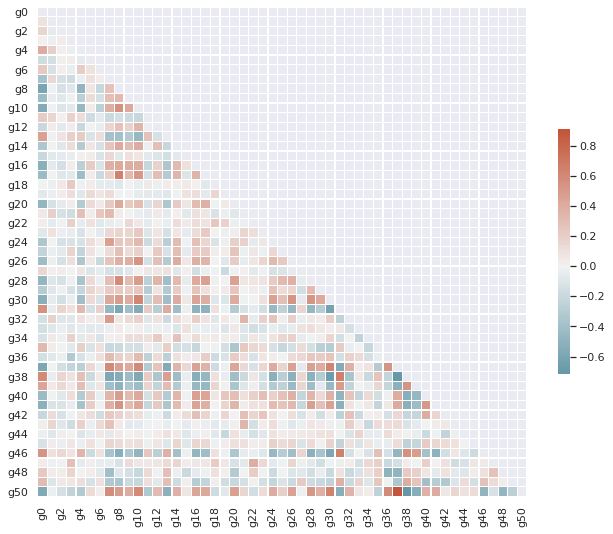

In [ ]:
# Comando equivalete ao plt.figure com a diferença que separa entre figura e eixos
# f, ax = plt.subplots(figsize=(11, 9))

plt.figure(figsize=(11, 9))

sns.heatmap(corr_genes, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.2, cbar_kws={"shrink": .5})

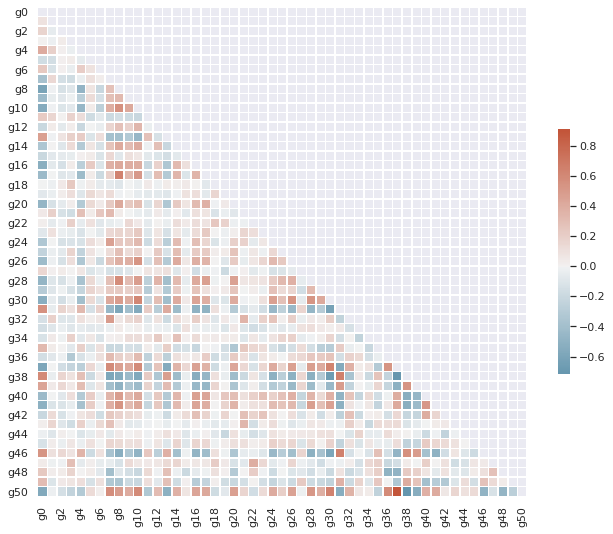

In [ ]:
#Para esse cógido temos: import pandas as pd, import numpy as np e import matplotlib.pyplot as plt

corr = dados.loc[:,'g0':'g50'].corr()                                   ##  Aqui selecionamos as colunas a serem correlacionadas com o método pd.df.corr() 
                                                                        #será retornado uma lista com a correlação de cada coluna.

mask = np.triu(np.ones_like(corr, dtype=bool))                          ##  A função np.ones_like retorna um array que tenha o tempo tamanho da lista de 
                                                                        #correlações, o 'dtype==bool' substitui o tipo de dados do resultado. Já a função
                                                                        # np.triu retorna uma cópia do array com os elementos abaixo da diagona da posição 
                                                                        #do índice da linha do array zerados. essencialmente nessa linha de código o mask
                                                                        #cria um grid em que apenas serão add elementos do heatmap nas posições em que se
                                                                        #tem o valor TRUE, ou seja, posições em que existe correlação.

f, ax = plt.subplots(figsize=(11, 9))                                   ## Aqui apenas é passado o tamanho da figura final, é uma linha da bilbiotexca 
                                                                        #MatPlotLib.pyplot

cmap = sns.diverging_palette(230, 20, as_cmap=True)                     ## Aqui é apenas criado a paleta de cores do heatmap levando em conta dois valores
                                                                        #float que representam os tons de âncora para extensões negativas e positivas do 
                                                                        #mapa e o atributo 'as_map' que resgata 'matplotlib.colors.Colormap'

sns.heatmap(corr, mask=mask, cmap=cmap, center=0,                       
            square=True, linewidths=.5, cbar_kws={"shrink": .5})        ##  Para a formação do heatmap passa-se o corr como parâmetro a ser plotado o mask 
                                                                        #para as posições, o cmap com relação as cores, 'center' apenas como valor em torno 
                                                                        #do qual será feita a escala, 'square' é apenas a estilização do gráfico, assim como
                                                                        #'linewidths', e por último, temos 'cbar_kws' que também pela uma opção de estilo da 
                                                                        #biblioteca do matplotlib

###Desafio 07: Resumo do que você aprendeu com os dados

 

*   Algumas variáveis genéticas tem efeitos sobre os tipos celulares e outras não, como mostrado no heatmap obtido no desafio 5

*   Os dados da dose D1 estudados no tempo 48 apresentam alguma coisa difernte pois há uma maior quantidade de amostras
